In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecom=pd.read_csv('C:\\Users\\bharg\\Desktop\\Bhargav\Telecom Churn Dataset.csv')
telecom

,ID,Gender,SeniorCitizen,Married,Tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,1,No,No,DSL,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,34,Yes,No,DSL,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,2,Yes,No,DSL,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,45,No,No,DSL,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,Female,0,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,No,Two year,Yes,Credit card (automatic),99.05,6416.70,No
122,122,Male,0,No,3,Yes,No,No,No,No,No,One year,No,Mailed check,19.60,61.35,No
123,123,Male,0,No,1,Yes,No,DSL,No,No,No,Month-to-month,Yes,Electronic check,45.65,45.65,Yes
124,124,Male,0,No,30,Yes,No,DSL,No,Yes,No,One year,No,Credit card (automatic),64.50,1929.95,No


In [3]:
telecom.duplicated().sum()

0

In [4]:
telecom.isnull().sum()

ID                  0
Gender              0
SeniorCitizen       0
Married             0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# telecom dataset doesnot have null values

In [5]:
numerical=[fea for fea in telecom.columns if telecom[fea].dtypes!=object]
numerical

['ID', 'SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']

In [6]:
categorical=[fea for fea in telecom.columns if telecom[fea].dtypes==object]
categorical

['Gender',
 'Married',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [7]:
telecom_numerical_data=telecom[numerical]
telecom_numerical_data

,ID,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
0,0,0,1,29.85,29.85
1,1,0,34,56.95,1889.50
2,2,0,2,53.85,108.15
3,3,0,45,42.30,1840.75
4,4,0,2,70.70,151.65
...,...,...,...,...,...
121,121,0,65,99.05,6416.70
122,122,0,3,19.60,61.35
123,123,0,1,45.65,45.65
124,124,0,30,64.50,1929.95


In [8]:
telecom_categorical_data=telecom[categorical]
telecom_categorical_data

,Gender,Married,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,DSL,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,Yes,No,DSL,No,No,No,One year,No,Mailed check,No
2,Male,No,Yes,No,DSL,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,DSL,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,Yes,No,Fiber optic,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,Two year,Yes,Credit card (automatic),No
122,Male,No,Yes,No,No,No,No,No,One year,No,Mailed check,No
123,Male,No,Yes,No,DSL,No,No,No,Month-to-month,Yes,Electronic check,Yes
124,Male,No,Yes,No,DSL,No,Yes,No,One year,No,Credit card (automatic),No


# here telecom data classified into numerical data and categorical data.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
telecom_categorical_data['Churn']=le.fit_transform(telecom_categorical_data['Churn'])

C:\Users\bharg\AppData\Local\Temp\ipykernel_6316\3679350774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_categorical_data['Churn']=le.fit_transform(telecom_categorical_data['Churn'])


In [11]:
telecom_categorical_data['Churn']

0      0
1      0
2      1
3      0
4      1
      ..
121    0
122    0
123    1
124    0
125    0
Name: Churn, Length: 126, dtype: int32

In [12]:
list(le.classes_)

['No', 'Yes']

In [13]:
x=telecom_numerical_data[['MonthlyCharges','TotalCharges']]
x

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
121,99.05,6416.70
122,19.60,61.35
123,45.65,45.65
124,64.50,1929.95


In [14]:
y=telecom_categorical_data['Churn']
y

0      0
1      0
2      1
3      0
4      1
      ..
121    0
122    0
123    1
124    0
125    0
Name: Churn, Length: 126, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=12)

In [16]:
from collections import Counter
Counter(y_train)

Counter({0: 69, 1: 19})

# This is Balanced data

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
n=GaussianNB()

In [19]:
n.fit(x_train,y_train)

GaussianNB()

In [20]:
y_predicted=n.predict(x_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [21]:
n.score(x_test,y_test)

0.7368421052631579

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
matrix=confusion_matrix(y_test,y_predicted)
matrix

array([[22,  2],
       [ 8,  6]], dtype=int64)

Text(50.722222222222214, 0.5, 'True class')

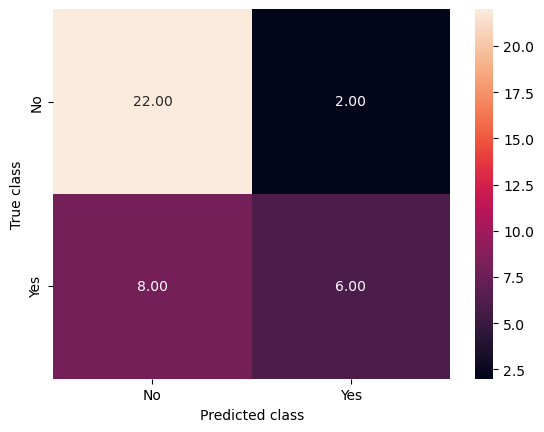

In [24]:
sns.heatmap(matrix,annot=True,fmt='.2f',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.xlabel('Predicted class')
plt.ylabel('True class')

# comments:
1. In the above heatmap 22 predicted is no and actual also no its true positive.
2. In the above heatmap 6 predicted is yes and actual also yes its true positive.
3. In the above heatmap 8 predicted is no but actually its yes and 2 is predicted yes but actually its no its false positive.
4. In the above heatmap lighter color indicates more true positive and darker color indicates more false positive.

In [25]:
print(classification_report(y_test,y_predicted,digits=3))

              precision    recall  f1-score   support

           0      0.733     0.917     0.815        24
           1      0.750     0.429     0.545        14

    accuracy                          0.737        38
   macro avg      0.742     0.673     0.680        38
weighted avg      0.739     0.737     0.716        38



# comments:
1. In the above classification report precision is how accurately model predicts the true positive classes.
2. In the above classification report recall is how accurately model classify the classes.
3. f1 score is a single metric that combines both precision and recall using harmonic mean.
4. The model accuracy is 0.737.